# Daisyworld

As in the previous practical, many of the details and parameters from this lab come from the STELLA version at: http://www3.geosc.psu.edu/~dmb53/DaveSTELLA/Daisyworld/daisyworld_model.htm

Daisyworld was first conceived by James Lovelock and Andrew Watson. It is a very simple planet  that has only one species of life on its surface -- pure white daisies. The rest of the planet is covered by gray soil. The daisies receive energy from the sun and water and nutrients from the soil. The atmosphere is very simple, with no clouds and no greenhouse gases. You can read more about Daisyworld in Chapter 2 of the textbook.

We are interested here in modelling how the surface temperature of Daisyworld changes in response to the coverage of daisies, and how the coverage of daisies changes in response to the temperature. These each affect one another in different ways, which we will explore below.

## The effect of daisies on surface temperature

Recall from the lectures, textbook, and previous problems that when incoming energy from the sun arrives at the surface of Daisyworld (or any planet), some fraction is reflected back to space and the rest is absorbed by the surface. That  fraction of incoming energy that is reflected is known as the **albedo**. 

In the Week 3 practical, we learned that the only things on Daisyworld are flowers and soil. So if $f_{flower}$ represents the fraction of the planet covered by flowers, the rest will be soil:

$$f_{soil} = 1 - f_{flower}$$

We also learned that on Daisyworld soil has an albedo of $A_{soil}=0.4$. For now we will assume flowers have an albedo of $A_{flower}=0.75$, but this will change later in the exercises.

We also worked out in Week 3 that we can express the overall planetary albedo as:

$$A = A_{flower}*f_{flower} + A_{soil}*f_{soil}$$

Finally, we applied our favourite equation to calculate the effective temperature of a planet, knowing that the solar flux at Daisyworld is 3700 W m$^{-2}$:

$$T_e = \left (\dfrac{S}{(4*\sigma)}*(1-A) \right )^{0.25}$$

In the Week 6 practical, we put this information together to write a **function** that takes the fraction of the planet covered by flowers (`frac_flower`) as an input and returns the temperature of Daisyworld (`Te`) as an output:

In [1]:
def Daisyworld_Temp(frac_flower):

    # Function for calculating and plotting the effective temperature of Daisyworld
    #   based on the fraction of the planet covered by flowers

    # Define the albedos of flowers and the albedo of soil (unitless)
    albedo_flower = 0.75
    albedo_soil   = 0.4

    # Define the solar flux on Daisyworld, in W/m2
    S = 3700.0

    # Define the Stefan-Boltzmann constant, in W/m2/K4
    sigma = 5.67e-8

    # The fraction covered by soil is the rest of the planet, or 1.0 - the fraction covered by flowers
    frac_soil = 1.0 - frac_flower

    # The albedo is the sum of the two albedos after each has been multiplied by its fractional coverage.
    albedo = frac_soil * albedo_soil + frac_flower * albedo_flower

    # Calculate the temperature as a function of the albedo and constant parameters
    Te = ((S*(1-albedo))/(4*sigma))**0.25
    
    # return the temperature value
    return Te

## <font color=blue>Complete Exercise 1 now</font>

## The effect of surface temperature on daisies

We learned in Week 4 that the growth rate of the population of flowers (in units of *fraction of the planet covered by flowers / year*) is defined as:
$$1-0.005*(295.5-T_e)^2$$

We also learned that the growth rate **can never be below zero** (this would represent daisy death, which we will deal with separately) - instead, any value that would be negative should instead be zero.

In the Week 6 practical, we put this information together to write a **function** that takes the temperature of Daisyworld (`Te`) as an input and returns the growth rate of the flowers (`growth_rate`) as an output:

In [2]:
def Daisyworld_Growth(Te):
    
    # Function for calculating and plotting the flower growth rate on Daisyworld
    #   based on the temperature of the planet

    # Te is the input temperature, in K
    
    # Use the growth rate equation to calculate current growth rate.
    growth_rate = 1-0.005*(295.5-Te)**2
    
    # Test whether the current growth rate is negative.
    # If it is, change it to zero (no growth)
    if growth_rate < 0:
        growth_rate = 0
        
    # Return the growth rate
    return growth_rate

## <font color=blue>Complete Exercise 2 now</font>

## Building a model for Daisyworld

At this stage, we know how temperature changes due to daisy coverage and we know how daisy growth changes due to temperature. All we need now is to put these things together!

We want to create a new function that represents Daisyworld. Our function should have the following inputs:
- the total time for our experiment
- the albedo of flowers, default = 0.75

So our first line will look something like this:

At the end, we want to return
- time
- flower fraction
- temperature

So our final line will look something like this:<br>

Now we can think about what goes on in the function...

At the start of our program, we need to set up:
1. an array for the time counter, based on the `Total_Time` variable that we set as argument.
2. arrays full of zeros for `frac_flower` and `Te` that we will eventually fill with values.
3. the initial conditions for both the fraction of the planet covered by flowers (our `frac_flower[0]`) as well as the effective temperature (`Te[0]`). More details on how to do that in the exercise.

After the initial conditions, we need to think about how `frac_flower` and `Te` are changing. If the fraction covered by flowers changes, this will change the albedo, which will change the temperature. But if the temperature changes, this will change the growth rate of daisies, which will change the fraction covered by flowers.

So we will represent this with a loop over time, where at each moment in time we:
1. calculate the current fraction of the planet covered by flowers, using the previous temperature to calculate a growth rate and then
2. calculate the new temperature using the new value of the fraction covered by flowers.

## <font color=blue>Complete Exercise 3 now</font>

## Testing the sensitivity of the model to different parameters

You should have found in the previous exercise that our model as designed currently reaches steady state quickly. In the next exercise, we will test the sensitivity of that finding to daisy albedo using **sensitivity analysis**.

Look back to the Week 7 practical (The Bathtub) if you need a reminder about sensitivity analysis.

## <font color=blue>Complete Exercise 4 now</font>

## <font color=purple> The impact of external forcing: changing solar flux</font><br>

<font color=purple>So far, we have only investigated changes that are **internal** to the system. We have assumed any **external forcing** (here, the amount of solar energy the planet receives) has stayed constant. Now we will investigate the impact of changing the external forcing using solar flux.<br><br>

Daisyworld's sun begins it life with a diminished solar flux ($S$ (like all suns) and grows steadily hotter and hotter, producing more and more energy. At the beginning of Daisyworld time, its sun provides 2200 W/m$^2$, and 2 billion years later, its sun gives off 4400 W/m$^2$. A star like our Sun will take something like 10 billion years to run through its life cycle, but we have compressed things a bit to make our model runs shorter.<br><br>

In our model, we will use a simple equation for a line to describe this behaviour (over a period of 200 time units = 2 billion years):<br><br>

<center>*$S$ = 2200 + time $\times$ (4400/200)*</center><br><br>

We can test that this equation behaves as expected by plotting $S$ over our entire time period:</font>

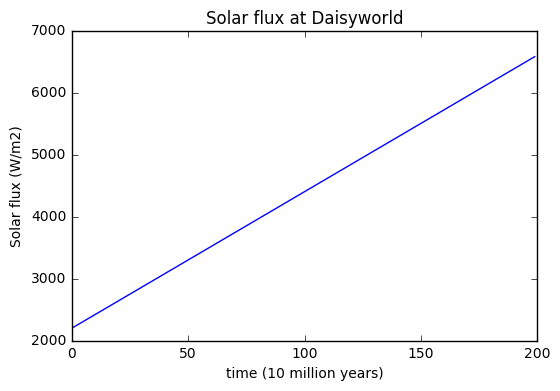

In [90]:
import numpy
import matplotlib.pyplot as pyplot
%matplotlib inline
time = numpy.arange(0,200,step=1)
S = 2200 + time * (4400./200)
pyplot.plot(time,S)
pyplot.xlabel('time (10 million years)')
pyplot.ylabel('Solar flux (W/m2)')
pyplot.title('Solar flux at Daisyworld')
pyplot.show()

## <font color=purple>If you have extra time, complete Exercise 5</font>